Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction (9).csv


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Final Model Evaluation:
✅ Accuracy : 0.9554
🎯 Precision: 0.9774
📢 Recall   : 0.9323


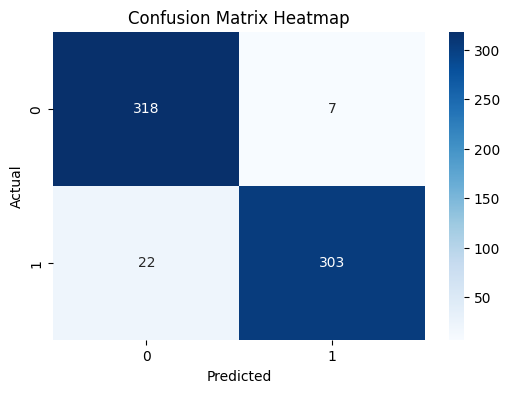

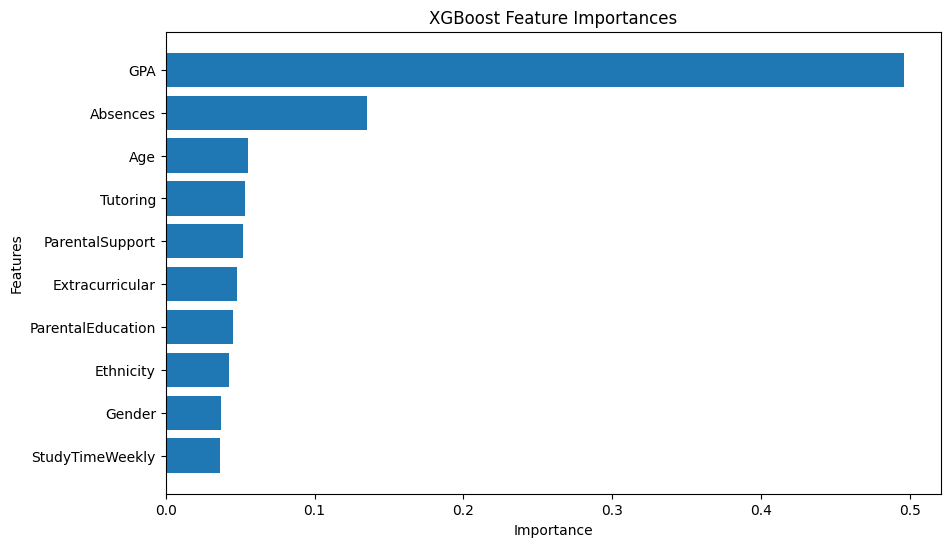

In [12]:
# Install required packages
!pip install xgboost imbalanced-learn seaborn scikit-learn pandas matplotlib --quiet

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Upload CSV file
from google.colab import files
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Preprocessing
df = df.drop(columns=['StudentID'])  # Drop ID column

# Define target: 1 = Pass (GradeClass <= 2), 0 = Fail
df['Result'] = df['GradeClass'].apply(lambda x: 1 if x <= 2 else 0)
df = df.drop(columns=['GradeClass'])

# Optional: Drop low-importance features
drop_cols = ['Music', 'Volunteering', 'Sports']  # You can adjust this
df = df.drop(columns=drop_cols)

# Features and label
X = df.drop(columns=['Result'])
y = df['Result']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Optimized XGBoost model
model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    min_child_weight=3,
    reg_alpha=0.1,
    reg_lambda=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\n📊 Final Model Evaluation:")
print(f"✅ Accuracy : {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"📢 Recall   : {recall:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Feature importance
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
